# PISA Data Exploration
## by Henry Harfouche

## Preliminary Wrangling

        > This dataset contains survey information on students as they approach the end of their compulsory education. It aggregates information on 65 countries and looks at how well students are ready for life as opposed to how well they have learned their school's curriculum. The 2012 data set can be found on This Page and the Technical Report can be found at this address

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
pisa_df= pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pisa_dict= pd.read_csv('pisadict2012.csv', encoding = "ISO-8859-1", header=0, names=['code','meaning'])

Let's have a look at the data sets, the number of rows and columns in each

In [4]:
pisa_df.head()

Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   

   STIDSTD  ST01Q01  ST02Q01   ...     W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0   ...      13.7954   13.9235  13.1249  13.1249   
1        2       10      1.0   ...      13.7954   13.9235  13.1249  13.1249   
2        3        9      1.0   ...      12.7307   12.7307  12.7307  12.7307   
3        4        9      1.0   ...      12.7307   12.7307  12.7307  12.7307   
4        5        9      1.0   ...      12.7307   12.7307  12.7307  12.7307   

   W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0    4.3389  13.0829       19        1     0.2098  22NOV13  
1    4.3389  13.0829       19        1     0.2098  22NOV13  
2    4.2436  12.7307       19        1     0.1999  22NOV13  
3    4.2436  12.7307       19        1     0.1999  22NOV13  
4    4.2436  12.7307       19        1     0.1999  22NOV13  

[5 rows x 636 columns]

In [5]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


As we can see from the code above, the dataset contain 485,490 entries with 635 different columns/variables. That is a lot of data collection! Thankfully, we can use the second dataframe pisa_dict and cross reference the codes with their meanings and with the technical report which can be found on http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf

In [6]:
pisa_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 2 columns):
code       635 non-null object
meaning    635 non-null object
dtypes: object(2)
memory usage: 10.0+ KB


In [7]:
pisa_dict.head()

code                                            meaning
0       CNT                           Country code 3-character
1  SUBNATIO  Adjudicated sub-region code 7-digit code (3-di...
2   STRATUM  Stratum ID 7-character (cnt + region ID + orig...
3      OECD                                       OECD country
4        NC                       National Centre 6-digit Code

These codes represent the column variables in pisa_df

After spending a considerable amount of time glancing over the 472 page PDF document, i've decided to look into the following quantitative variables:

PV1MATH    Math test scores
PV1READ    Reading test scores
PV1SCIE    Science test scores

These are the respective test scores in math, reading and science

I also want to look at these variables:

LMINS    : Learning time in test language   (Minutes/week)
MMINS    : Learning time for mathematics    (Minutes/week)
SMINS    : Learning time for science        (Minutes/week)

As per the full technical report, these are calculated by multiplying the average time of each class for the subject * number of classes per week. So the resulting units are Minutes/Week.

Finally, for some qualitative data. I am going to be comparing the results against the following variables

OECD/Non-OECD countries:    I would like to establish if there are difference amongst students in OECD countries and students in countries that do not belong to OECD countries. Of course this classification will be valid of as 2012 as more countries may have joined the OECD since then

Gender Gaps, I would like to filter out the data by genders  (Male/Female)


Now... how did I figure out which variables I wanted to look at?

I simply printed the dictionary of codes and looked through the list for anything that caught my eye.

In [8]:
list(pisa_dict.meaning)[0:5]

['Country code 3-character',
 'Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)',
 'Stratum ID 7-character (cnt + region ID + original stratum ID)',
 'OECD country',
 'National Centre 6-digit Code']

And once I found what I was interested in, I found the codes with the following command

In [9]:
pisa_dict.query('meaning=="OECD country"')

code       meaning
3  OECD  OECD country

In [10]:
pisa_dict.query('meaning=="Gender" or meaning=="Learning time (minutes per week)  - <test language>" or meaning=="Learning time (minutes per week)- <Mathematics>" or meaning=="Learning time (minutes per week) - <Science>"')

code                                            meaning
11   ST04Q01                                             Gender
460    LMINS  Learning time (minutes per week)  - <test lang...
466    MMINS    Learning time (minutes per week)- <Mathematics>
476    SMINS       Learning time (minutes per week) - <Science>

Other codes I am interested in, CNT : this represents the countries. PV1MATH, PV1READ, PV1SCIE

Now I will extract the columns (Codes I want)

In [11]:
pisa_sub= pisa_df[['CNT','OECD','ST04Q01','PV1MATH','PV1READ','PV1SCIE','LMINS','MMINS','SMINS']]

In [12]:
pisa_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 9 columns):
CNT        485490 non-null object
OECD       485490 non-null object
ST04Q01    485490 non-null object
PV1MATH    485490 non-null float64
PV1READ    485490 non-null float64
PV1SCIE    485490 non-null float64
LMINS      282866 non-null float64
MMINS      283303 non-null float64
SMINS      270914 non-null float64
dtypes: float64(6), object(3)
memory usage: 33.3+ MB


MIGHT JUST DELETE THIS

Time to do some exploratory look at the variables themselves first, first lets look at LMINS MMINS and SMINS to see why there are missing data. Also we want to look at the Students and see why there are some that are duplicated and whats duplicated about them (we dont want double values in our fields)

### What is the structure of your dataset?

This data set is massive and as such i've decided to trim it down to the variables i'm interested in. Overall, there are 485490 entries which each represent a different unique individual. The important columns here are CNT (country), OECD (wether or not the country is an OECD country) ST04Q01 (gender) PV1MATH, PV1READ, PV1SCIE (Math test scores, reading/language test scores, and Science test scores). There is also LMINS (Minutes/week in class for language/reading courses, MMINS and SMINS (Minutes/week learning math and science.

### What is/are the main feature(s) of interest in your dataset?

I want to investigate Math, reading and science test scores and compare those results across 1) different countries 2) see the difference in OECD/NON-OECD countries 3) Look at gender differences and 4) Look at LMINS/MMINS/SMINS and see its effect on the Test Scores  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Its hard to say what will stand out before even looking at the data. I expect OECD countries to have better scores in all 3 categories just because the OECD is an organization founded to stimulate economic progress and world trade, so I expect these countries to have better standards of living (not examiend in this project) and thus provide better education for their citizens. I'm very interested in finding out the differences between Genders and also which countries score the highest.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I will start out by investigating each column by itself.

In [13]:
pisa_sub.CNT.nunique()

68

The study claimed to have 65 different yet our data contains 68 unique values. I will print out the list below to further investigate

In [14]:
pisa_sub.CNT.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

As we can see above, the United States was split up in 4 parts. Florida, Connecticut and Massachusetts, and also wholly aggregated as the United States of America. This explains why there are 68 unique values and not 65. I've decided to keep these 68 groups.

These groups are nominal and qualitative in nature

## What is the size or number of students surveyed per country

In [15]:
countries_size = pisa_sub.groupby('CNT').size().reset_index(name='counts')
countries_size.head()

CNT  counts
0    Albania    4743
1  Argentina    5908
2  Australia   14481
3    Austria    4755
4    Belgium    8597

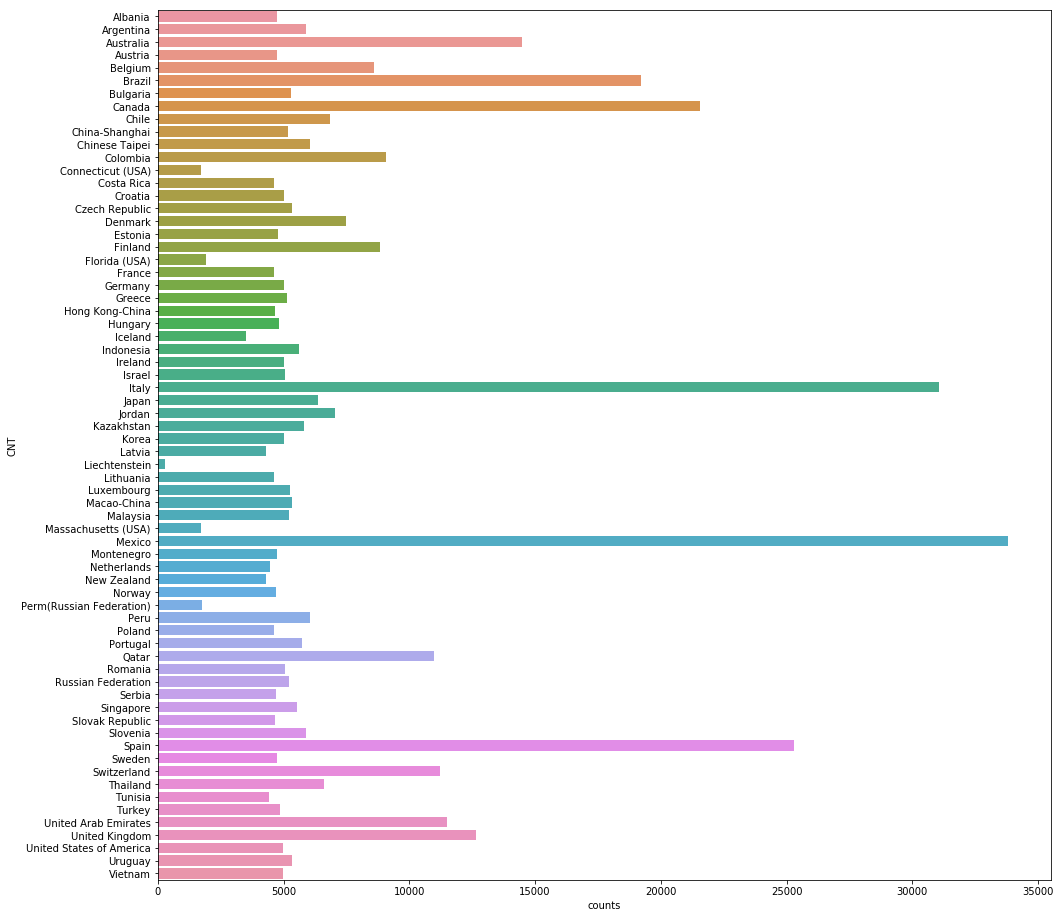

In [16]:
plt.figure(figsize = [16, 16]);
sb.barplot(data= countries_size, y=countries_size.CNT, x=countries_size.counts);


In [17]:
countries_size.sort_values(by='counts', inplace=True)
countries_size.head()

CNT  counts
35             Liechtenstein     293
12         Connecticut (USA)    1697
40       Massachusetts (USA)    1723
46  Perm(Russian Federation)    1761
19             Florida (USA)    1896

In [18]:
countries_size.tail()

CNT  counts
5   Brazil   19204
7   Canada   21544
57   Spain   25313
29   Italy   31073
41  Mexico   33806

Most of the countries have at least 2000 responses with a few exepctions. Liechtenstein has the fewest participants with 293 responses and Mexico the most with 33806.

## OECD

Let's do a quick examination of the OECD column now.

In [19]:
pisa_sub.OECD.unique()

array(['Non-OECD', 'OECD'], dtype=object)

In [20]:
OECD_counts = pisa_sub.OECD.value_counts().reset_index(name='counts')
OECD_counts

index  counts
0      OECD  295416
1  Non-OECD  190074

Text(0.5, 0, 'Number of OECD and Non-OECD countries')

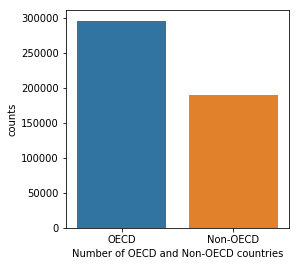

In [21]:
plt.figure(figsize = [4, 4]);
sb.barplot(data= OECD_counts, x=OECD_counts['index'], y=OECD_counts.counts);
plt.xlabel('Number of OECD and Non-OECD countries')

As can be observed in the table above, there is 295416 students that are a part of OECD countries and 190074 students that reside in a country that is not part of the OECD. 

We can do a quick analysis to determine which countries are a part of the OECD and which aren't.

In [22]:
countries_oecd= pisa_sub[['CNT','OECD']]
countries_oecd.drop_duplicates(inplace=True)
countries_oecd.groupby('OECD').size().reset_index(name='counts')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


OECD  counts
0  Non-OECD      34
1      OECD      34

There are a total of 34 OECD countries and 34 non-oecd countries

In [23]:
countries_oecd.sample(5).reset_index(drop=True)

CNT      OECD
0      Argentina  Non-OECD
1        Vietnam  Non-OECD
2         Norway      OECD
3           Peru  Non-OECD
4  Liechtenstein  Non-OECD

## Gender

Remember, the Gender was classified under ST04Q01. Let's rename that column and start our univariate analysis.

In [24]:
pisa_sub.rename(columns={'ST04Q01':'Gender'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [25]:
pisa_sub.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [26]:
genders = pisa_sub.Gender.value_counts().reset_index(name='counts')
genders

index  counts
0  Female  245064
1    Male  240426

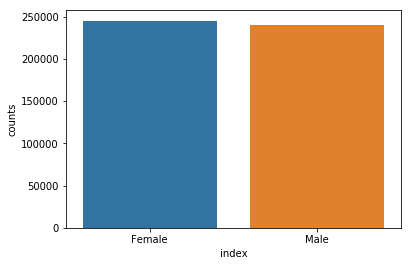

In [27]:
sb.barplot(data=genders, x=genders['index'], y =genders.counts)

There are 245,064 females and 240,426 males in our dataset. Pretty even for such a large survey

## Math, Linguistic/reading and Science test scores

Let's have a look at these columns to see what kind of information is inside. Remember, these scores are stored in the PV1MATH, PV1READ and PV1SCIE columns

In [28]:
pisa_sub[['PV1MATH','PV1READ','PV1SCIE']].dtypes

PV1MATH    float64
PV1READ    float64
PV1SCIE    float64
dtype: object

In [29]:
pisa_sub.count()

CNT        485490
OECD       485490
Gender     485490
PV1MATH    485490
PV1READ    485490
PV1SCIE    485490
LMINS      282866
MMINS      283303
SMINS      270914
dtype: int64

The test scores are of type 'float' which indicate they most likely contain decimals, there are also 485490 tess results for each subject (math, reading and science). Lets grab a quick sample and double check our values.

In [30]:
pisa_sub[['PV1MATH','PV1READ','PV1SCIE']].sample(5)

PV1MATH   PV1READ   PV1SCIE
287132  381.3756  371.4427  383.5696
93289   344.5319  293.4936  294.1440
248343  299.2756  226.8520  364.0806
1476    421.5688  501.3725  492.1112
245829  547.8346  559.3571  586.5722

Yes, the test scores contain decimals as predicted.

Lets have a quick look at our descriptive statistics

In [31]:
stats = pisa_sub[['PV1MATH','PV1READ','PV1SCIE']].describe()
stats

PV1MATH        PV1READ        PV1SCIE
count  485490.000000  485490.000000  485490.000000
mean      469.621653     472.004640     475.769824
std       103.265391     102.505523     101.464426
min        19.792800       0.083400       2.648300
25%       395.318600     403.600700     404.457300
50%       466.201900     475.455000     475.699400
75%       541.057800     544.502500     547.780700
max       962.229300     904.802600     903.338300

The mean test scores vary from 469 to 475. The lowest test scores are 0 and the highest score achieved was 962.229 in Math. The standard deviation is around 102 for each subject.

Lets draw a quick boxplot to get a visual representation of the results

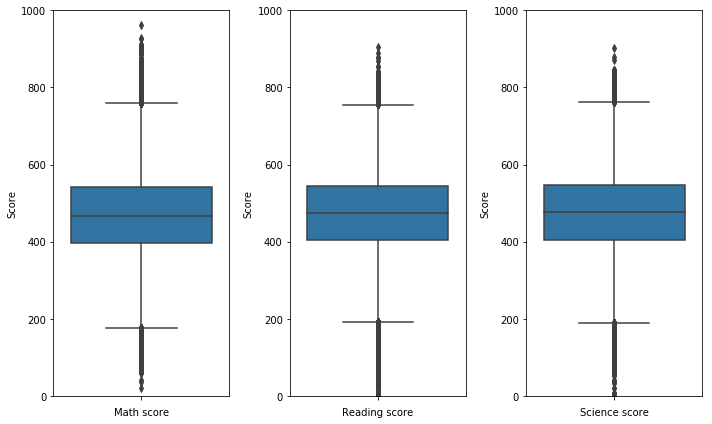

In [32]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
sb.boxplot(y=pisa_sub['PV1MATH'])
plt.xlabel('Math score')
plt.ylabel('Score')
plt.ylim(0,1000)

plt.subplot(1,3,2)
sb.boxplot(y =pisa_sub['PV1READ'])
plt.xlabel('Reading score')
plt.ylabel('Score')
plt.ylim(0,1000)

plt.subplot(1,3,3)
sb.boxplot(y=pisa_sub['PV1SCIE'])
plt.xlabel('Science score')
plt.ylabel('Score')
plt.ylim(0,1000)

plt.tight_layout()

By drawing a boxplot we can quickly affirm that there are many outliers in our data set. However, most of the data resides between 200 and 775.

Lets quickly visualize our distribution in another format

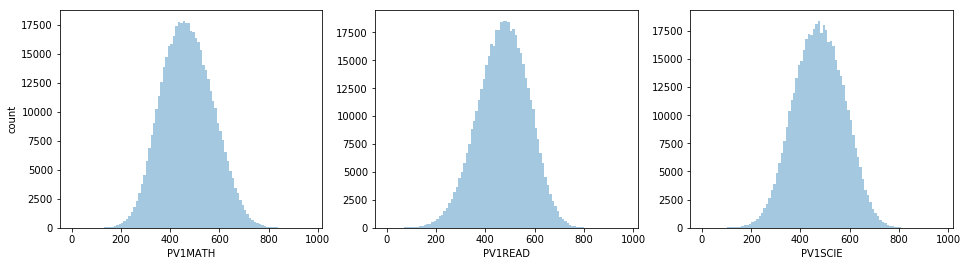

In [33]:
interval = 10
bin_edges=np.arange(0, pisa_sub.PV1MATH.max()+interval, interval)
fig = plt.figure(figsize=(16, 4))

#plt.set_title('Distribution of Math, Reading and Science test scores in bins of 10')

plt.subplot(1,3,1)
sb.distplot(pisa_sub['PV1MATH'], kde=False, bins=bin_edges)
plt.ylabel('count')

plt.subplot(1,3,2)
sb.distplot(pisa_sub['PV1READ'], kde=False, bins=bin_edges)

plt.subplot(1,3,3)
sb.distplot(pisa_sub['PV1SCIE'], kde=False, bins=bin_edges)

As expected, the Math, Reading and Science test scores each follow a normal distribution throughout the whole set
The max, mins, mean and interquartile values are found above in the table 'stats'

## Learning minutes per week for Math, Reading/Language and Science

Remember, these values are in Minutes per week according to the Technical report. The column names are MMINS, LMINS, SMINS

In [34]:
pisa_sub[['MMINS','LMINS','SMINS']].dtypes

MMINS    float64
LMINS    float64
SMINS    float64
dtype: object

In [35]:
pisa_sub[['MMINS','LMINS','SMINS']].sample(5)

MMINS  LMINS  SMINS
315793    NaN    NaN    NaN
483607  180.0  180.0  270.0
382743    NaN    NaN    NaN
89015     NaN    NaN    NaN
149699  240.0  240.0  180.0

In [36]:
pisa_sub[['MMINS','LMINS','SMINS']].describe()

MMINS          LMINS          SMINS
count  283303.000000  282866.000000  270914.000000
mean      226.007056     219.276636     211.122460
std        97.448421      97.997730     131.368322
min         0.000000       0.000000       0.000000
25%       180.000000     165.000000     120.000000
50%       220.000000     200.000000     180.000000
75%       250.000000     250.000000     270.000000
max      3000.000000    2400.000000    2975.000000

A quick boxplot will show us if there are many outliers. We can look into that and then later in the analysis determine if we should remove them.

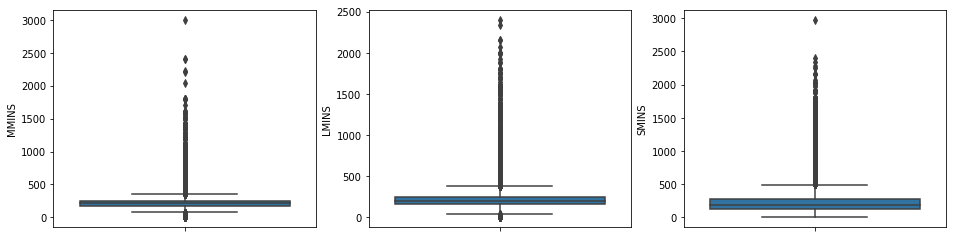

In [37]:
fig = plt.figure(figsize=(16, 4))

#plt.set_title('Distribution of Math, Reading and Science test scores in bins of 10')

plt.subplot(1,3,1)
sb.boxplot(y=pisa_sub['MMINS'])

plt.subplot(1,3,2)
sb.boxplot(y=pisa_sub['LMINS'])

plt.subplot(1,3,3)
sb.boxplot(y=pisa_sub['SMINS'])

As we can see, there seems to be a lot of outliers, we will deal with them at a later stage, I want to assess their impact on the binomial distributions.

3000 hours or even 2400 minutes of math in class per week seems alot. Suppose that in some countries students go to school for 6 days. 2400 minutes per week amounts to 400minutes per day which amounts to almost 7 hours of math per day.

In [38]:
pisa_sub.query('MMINS >=2000 or LMINS>= 2000 or SMINS >=2000').count()

CNT        29
OECD       29
Gender     29
PV1MATH    29
PV1READ    29
PV1SCIE    29
LMINS      23
MMINS      24
SMINS      21
dtype: int64

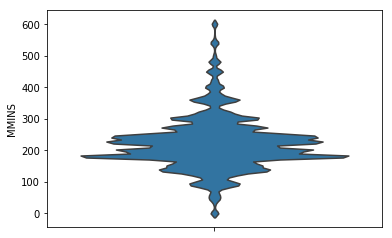

In [39]:
sb.violinplot(y=pisa_sub.query("MMINS<=600")['MMINS'], inner=None)

In [40]:
pisa_sub.query("MMINS<=600").count()

CNT        281261
OECD       281261
Gender     281261
PV1MATH    281261
PV1READ    281261
PV1SCIE    281261
LMINS      275620
MMINS      281261
SMINS      263893
dtype: int64

In [41]:
pisa_sub[['MMINS','LMINS','SMINS']].count()

MMINS    283303
LMINS    282866
SMINS    270914
dtype: int64

There doesn't seem to be that many outliers compared to the sample size of around 280,000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Test scores per country

This section will focus on comparing the test scores per country in the data set. The mean test scores will be shown

In [42]:
pisa_sub[['PV1MATH','PV1READ','PV1SCIE']].count()

PV1MATH    485490
PV1READ    485490
PV1SCIE    485490
dtype: int64

In [43]:
country_test_scores=pisa_sub.groupby('CNT').agg({'CNT':np.size,'PV1MATH':np.mean, 'PV1READ':np.mean,'PV1SCIE':np.mean,})

country_test_scores.head()

CNT     PV1MATH     PV1READ     PV1SCIE
CNT                                                 
Albania     4743  395.296185  396.424292  399.068070
Argentina   5908  395.402241  403.511227  410.369278
Australia  14481  492.842855  500.845303  511.250599
Austria     4755  507.711753  490.918021  507.213082
Belgium     8597  519.868902  512.319008  510.475079

In [44]:
country_test_scores.rename(columns={'CNT':'Count'}, inplace=True)

In [45]:
country_test_scores.head()

Count     PV1MATH     PV1READ     PV1SCIE
CNT                                                 
Albania     4743  395.296185  396.424292  399.068070
Argentina   5908  395.402241  403.511227  410.369278
Australia  14481  492.842855  500.845303  511.250599
Austria     4755  507.711753  490.918021  507.213082
Belgium     8597  519.868902  512.319008  510.475079

Now that the backend has been complete, lets sort the values and chart the results

In [46]:
country_test_scores.sort_values(by=['PV1MATH'], ascending=False, inplace=True)

In [47]:
indexes= country_test_scores.index

first_group  =indexes[0:16]
second_group =indexes[17:33]
third_group  =indexes[34:50]
fourth_group =indexes[51:68]

group1= country_test_scores.loc[first_group]
group2= country_test_scores.loc[second_group]
group3= country_test_scores.loc[third_group]
group4= country_test_scores.loc[fourth_group]

groups=[group1,group2,group3,group4]
base_color=sb.color_palette()[0]

plt.figure(figsize = [12, 12]);
ticks=[0,100,200,300,400,500,600,700]

for i in range(len(groups)):
    plt.subplot(2,2,i+1)
    sb.barplot(data=groups[i], x=groups[i].index, y=groups[i]['PV1MATH'],color=base_color)
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.yticks(ticks=ticks)
plt.tight_layout()


The top 5 countries/regions for Math  are China-Sanghai with a score of 610, and Singapore, Hong Kong-China, Chinese Tapei and Korea with a score of approximately 550.

The 5 countries in the bottom of the list with a score of approximately 400 are Jordan, Brazil, Qatar, Indonesia and Peru 

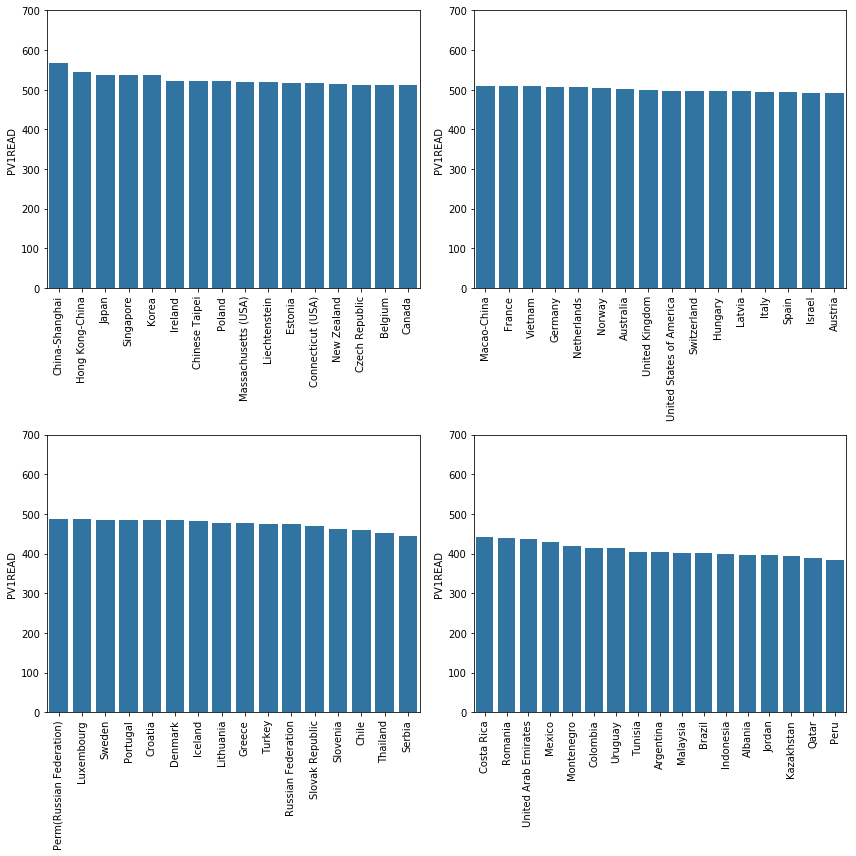

In [48]:
country_test_scores.sort_values(by=['PV1READ'], ascending=False, inplace=True)
indexes= country_test_scores.index

first_group  =indexes[0:16]
second_group =indexes[17:33]
third_group  =indexes[34:50]
fourth_group =indexes[51:68]

group1= country_test_scores.loc[first_group]
group2= country_test_scores.loc[second_group]
group3= country_test_scores.loc[third_group]
group4= country_test_scores.loc[fourth_group]

groups=[group1,group2,group3,group4]
base_color=sb.color_palette()[0]

plt.figure(figsize = [12, 12]);
ticks=[0,100,200,300,400,500,600,700]

for i in range(len(groups)):
    plt.subplot(2,2,i+1)
    sb.barplot(data=groups[i], x=groups[i].index, y=groups[i]['PV1READ'],color=base_color)
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.yticks(ticks=ticks)
plt.tight_layout()


The top 5 countries/regions for Reading are China-Shanghai with a score of 560, and Hong Kong-China, Japan, Singapore and Korea with a score of 550.

The 5 countries on the bottom of the list with a score of approximately 400 are Albania, Jordan, Khazakhstan, Qatar and Peru

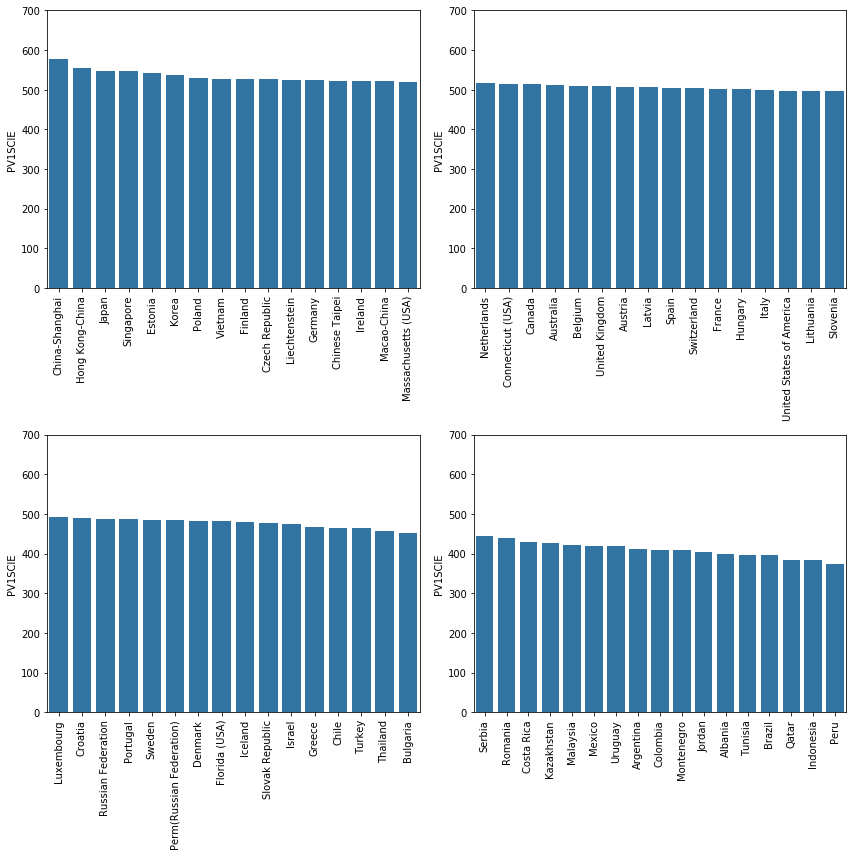

In [49]:
country_test_scores.sort_values(by=['PV1SCIE'], ascending=False, inplace=True)
indexes= country_test_scores.index

first_group  =indexes[0:16]
second_group =indexes[17:33]
third_group  =indexes[34:50]
fourth_group =indexes[51:68]

group1= country_test_scores.loc[first_group]
group2= country_test_scores.loc[second_group]
group3= country_test_scores.loc[third_group]
group4= country_test_scores.loc[fourth_group]

groups=[group1,group2,group3,group4]
base_color=sb.color_palette()[0]

plt.figure(figsize = [12, 12]);
ticks=[0,100,200,300,400,500,600,700]

for i in range(len(groups)):
    plt.subplot(2,2,i+1)
    sb.barplot(data=groups[i], x=groups[i].index, y=groups[i]['PV1SCIE'],color=base_color)
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.yticks(ticks=ticks)
plt.tight_layout()

The top 5 countries/region for Science are China-Shanghai with a score of approximately 575, and Hong Kong-China, Japan, Singapore and Estonia with a score of approximately 550.

The 5 countries on the bottom of the list are Tunisia, Brazil, Qatar, Indonesia and Peru with a score of approximately 400.

## Test scores OECD vs Non-OECD

This section will focus on comparing the distribution of the test scores in Math, Reading and Science amongst countries who are a part of the OECD and countries that are not in the OECD. 

In [50]:
pisa_sub.head()

CNT      OECD  Gender   PV1MATH   PV1READ   PV1SCIE  LMINS  MMINS  \
0  Albania  Non-OECD  Female  406.8469  249.5762  341.7009    NaN    NaN   
1  Albania  Non-OECD  Female  486.1427  406.2936  548.9929  315.0  270.0   
2  Albania  Non-OECD  Female  533.2684  401.2100  499.6643  300.0    NaN   
3  Albania  Non-OECD  Female  412.2215  547.3630  438.6796  135.0  135.0   
4  Albania  Non-OECD  Female  381.9209  311.7707  361.5628    NaN    NaN   

   SMINS  
0    NaN  
1   90.0  
2    NaN  
3   90.0  
4    NaN

In [51]:
sb.color_palette()[5]

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354)

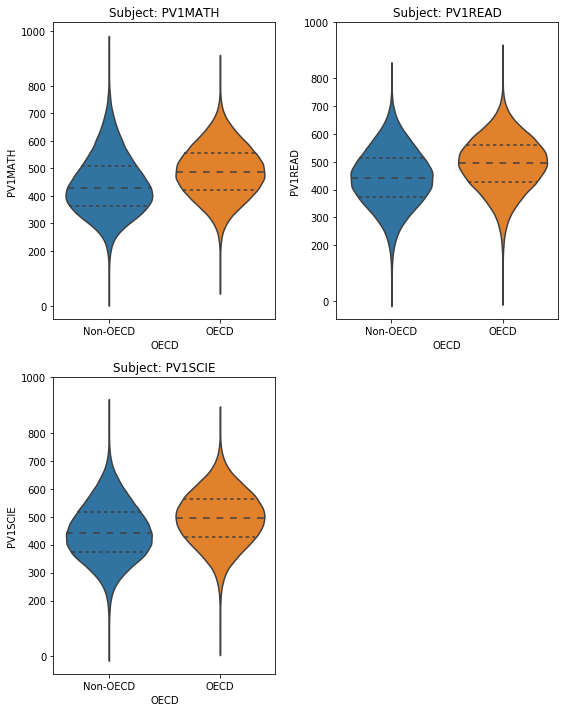

In [52]:
plt.figure(figsize = [8, 10]);

plots=['PV1MATH','PV1READ','PV1SCIE']

for i in range(len(plots)):
    plt.subplot(2,2,i+1)
    sb.violinplot(data=pisa_sub, x='OECD', y=plots[i], inner='quartile')
    plt.yticks(ticks=[0,200,300,400,500,600,700,800,1000])
    plt.title('Subject: '+ plots[i])
    
plt.tight_layout()

As we can quickly notice, the countries that are a part of the OECD perform better then countries that are not a part of the OECD in all 3 subjects.

In [53]:
plt.figure(figsize = [8, 10]);

plots=['PV1MATH','PV1READ','PV1SCIE']

for i in range(len(plots)):
    plt.subplot(2,2,i+1)
    sb.violinplot(data=pisa_sub, x='Gender', y=plots[i], inner='quartile', palette='Set1')
    plt.yticks(ticks=[0,200,300,400,500,600,700,800,1000])
    plt.title('Subject: '+ plots[i])
    
plt.tight_layout()

The distribution between Female and Male for Math and Science is roughly the same. However, in Reading, females tend to score better. Once we get to the multivariate section, we will examine Male/Female differences in OECD and non-OECD countries.

## Learning time Minutes per week vs Test Scores

In this section, we will examine the general relationship between the Learning time in Minutes per Week for each subject (MMINS, LMINS, SMINS) versus the Test scores (PV1MATH, PV1READ, PV1SCIE). I expect this section to require more analysis and the test scores on a country to country basis will be examined a little later.

As a reminder, this is the dataset and the information that we currently have.

In [54]:
pisa_sub.head(3)

CNT      OECD  Gender   PV1MATH   PV1READ   PV1SCIE  LMINS  MMINS  \
0  Albania  Non-OECD  Female  406.8469  249.5762  341.7009    NaN    NaN   
1  Albania  Non-OECD  Female  486.1427  406.2936  548.9929  315.0  270.0   
2  Albania  Non-OECD  Female  533.2684  401.2100  499.6643  300.0    NaN   

   SMINS  
0    NaN  
1   90.0  
2    NaN

### Relationship between MMINS and PV1MATH

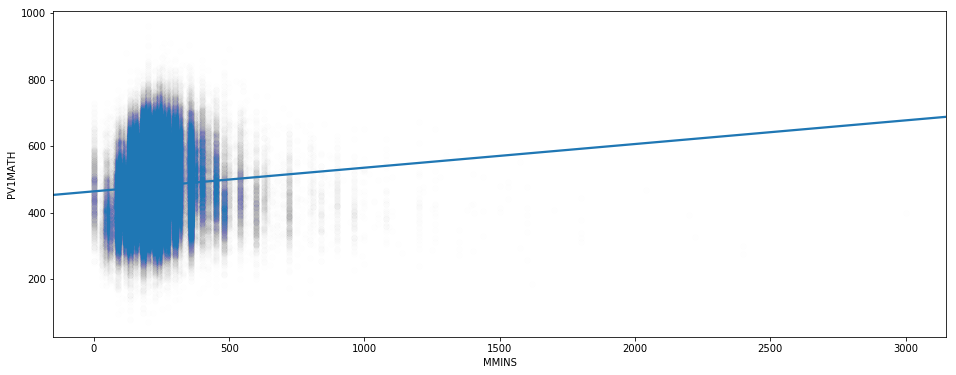

In [55]:
plt.figure(figsize = [16, 6]);
sb.regplot(data=pisa_sub, x='MMINS', y='PV1MATH', scatter_kws ={'alpha':1/200}, ci=None)

There seems to be a positive correlation between the amount of time spent learning Math and the Math test scores. A more rigorous model will be developed later on for specific countries and outliers will be removed.

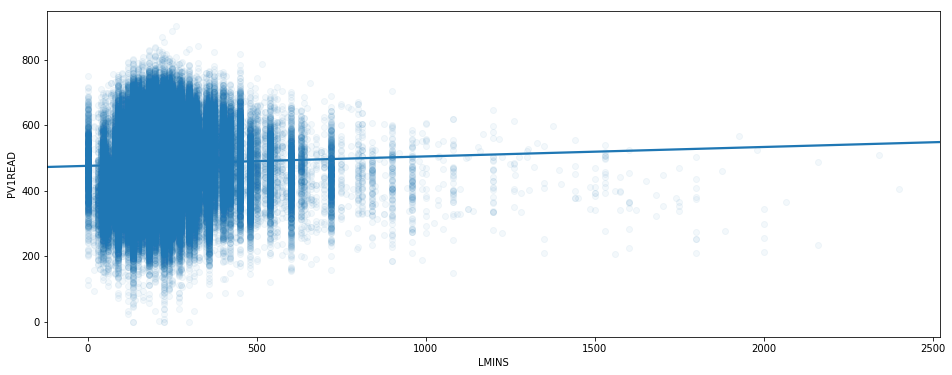

In [56]:
plt.figure(figsize = [16, 6]);
sb.regplot(data=pisa_sub, x='LMINS', y='PV1READ', scatter_kws ={'alpha':1/20}, ci=None)

There is a positive correlation between the amount of time spent learning the language and the Reading Scores.  A more rigorous model will be developed later on for specific countries and outliers will be removed.

In [57]:
plt.figure(figsize = [16, 6]);
sb.regplot(data=pisa_sub, x='SMINS', y='PV1SCIE', scatter_kws ={'alpha':1/20}, ci=None)

There is a positive correlation between the amount of time spent learning Science and the Science test scores.  A more rigorous model will be developed later on for specific countries and outliers will be removed.

#### Measuring the pearson correlation coefficient 'r' and the p-value

Since there were fewer responses in the MMINS, LMINS, and SMINS categories then in the PV1MATH, PV1READ and PV1SCIE category I will need to make a copy of the data and remove the rows with missing information.

In [58]:
pisa_sub[['MMINS','LMINS','SMINS','PV1MATH','PV1READ','PV1SCIE']].count()

MMINS      283303
LMINS      282866
SMINS      270914
PV1MATH    485490
PV1READ    485490
PV1SCIE    485490
dtype: int64

In [59]:
#dictionary with all the pair values
topics={'MMINS':'PV1MATH','LMINS':'PV1READ','SMINS':'PV1SCIE'} 


results= pd.DataFrame(columns=['Subject','pearsonR','p-value'])

#this part loops through the topics dictionary to get the pearson R coefficient and the p-value for the 3 pairs in topics.
for subject in topics:
    copy=pisa_sub.copy()
    copy=copy.dropna(subset=[subject])   #this line drops all the lines that do not contain any values
    pearsonr, pvalue = scipy.stats.pearsonr(copy[subject], copy[topics[subject]])
    results.at[subject,'Subject']  = subject
    results.at[subject,'pearsonR'] = pearsonr
    results.at[subject,'p-value']  = pvalue

                                                                
results                                                          

Subject   pearsonR       p-value
MMINS   MMINS  0.0691849  1.47577e-297
LMINS   LMINS  0.0288666   3.23603e-53
SMINS   SMINS   0.143548             0

A p-value of 0 reinforces the notion that a relationship exists between our x variable and our y variable. However, because there are a lot of different countries and different learning/teaching styles I will explore these values on a country to country basis.

## Multivariate Exploration: Math/Reading/Science Test scores vs OECD/Non-OECD vs Females/Males

I will start this section off by continuing the violin plots from the previous section. I will compare the Math, Reading and Test Scores amongst Males and Females in OECD countries and in countries that are not part of the OECD.

In [60]:
plt.figure(figsize = [14, 10]);

plots=['PV1MATH','PV1READ','PV1SCIE']

for i in range(len(plots)):
    plt.subplot(2,2,i+1)
    sb.violinplot(data=pisa_sub, x='OECD', y=plots[i], inner='quartile', hue='Gender', palette='Set1')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.yticks(ticks=[0,200,300,400,500,600,700,800,1000])
    plt.ylabel('Score')
    plt.title('Subject: '+ plots[i])
    
plt.tight_layout()

In the Math category, on the OECD side, we can notice a small gender difference in the mean and 3rd quartile in the favor of males. The same difference can be observed in the Science Test scores.

In the Reading section, we can notice a significant difference in both categories, OECD vs Non-OECD country and Females vs Males. OECD countries score significantly higher then their non-OECD counterparts and Females score significantly higher then their male counterparts in both regions (OECD and non-OECD). Females in the OECD category at the 1st quartile (25%) would belong in the 50th percentile in Non-OECD countries, this is a major difference.

Using the whole set, we can see that there is a positive correlation/relationship but I think that there is still too much noise. For this reason I am going to seperate the set in OECD/NON-OECD

## Multivariate Exploration: Test scores vs Learning time in Minutes per Week in OECD/Non-oecd countries

In this section I want to explore the relationship between the Learning time in Minutes and the Test scores on a more personalized/individual level.

I will start off by seperating the dataset in 2 sections, OECD and Non-OECD countries.

In [61]:
oecd_countries=pisa_sub.query('OECD=="OECD"')
non_oecd_countries = pisa_sub.query('OECD=="Non-OECD"')

Next, I will quickly plot the MMINS vs PV1MATH relationship for the OECD countries, I suspect this will not yield too many conclusive results as there are still 34 different countries in this dataset.

We also still haven't dealt with the outliers (some students reported that they were learning math in class for over 2500 minutes each week, that would be the equivalent of going to class 6 times per week and learning about math for 7 hours per day!! Unrealistic in my opinion.)

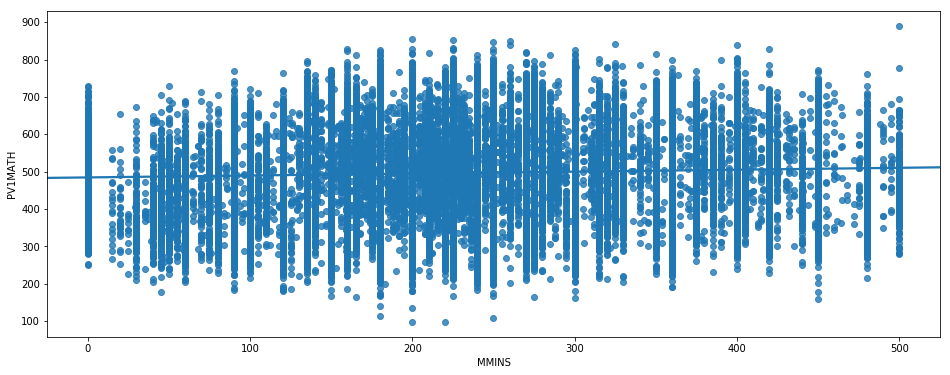

In [62]:
plt.figure(figsize = [16, 6]);
sb.regplot(data=oecd_countries.query('MMINS<=500'), x='MMINS', y='PV1MATH', ci=None)


In [63]:
#removing the rows with missing information
copy= oecd_countries.copy()
copy=copy.dropna(subset=['MMINS'])
pearsonr, pvalue = scipy.stats.pearsonr(copy.MMINS, copy.PV1MATH)
pearsonr, pvalue

(-0.0050475246214782285, 0.03372091573499289)

Our first attempt has not yielded any conclusive results.

Here I will deal with the outliers since it would be wrong to include these in the future correlation equations.

Methodology
- I calculated the AVG (average) learning time in minutes per week for all topics and plotted these on a country to country basis using a boxplot diagram. The advantage of box plot diagrams is that matplotlib automatically labels any outliers as any value greater then 1.5x (Q3 - A1). In fact, the upper portion of the box diagram is 1.5x(Q3-Q1) and any outliers are denoted as dots/circles outside this range.
- I examined the results a couple of times and to save space in this notebook, I've only included the final result.
- As such I am chosing to cut out every result greater then 1000. We can even get more rigorous and reduce any results greater then 600minutes per week but I will give these students the benefit of the doubt. 1000 hours per week amounts to just under 3 hours per day of learning on a 6day basis. Because I am not familiar with all the educational systems I think 3 hours per day 6 day per week is a very conservative approach.  


In [64]:
plt.figure(figsize = [18, 10]);
oecd_countries['AVG'] =oecd_countries[['MMINS','LMINS','SMINS']].mean(axis=1)

sb.boxplot(data=oecd_countries.query('AVG<=1000'),x='CNT', y='MMINS')
plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

In [65]:
oecd_countries.head()

CNT  OECD  Gender   PV1MATH   PV1READ   PV1SCIE  LMINS  MMINS  \
22151  Australia  OECD  Female  561.5439  582.3127  583.4950  300.0  300.0   
22152  Australia  OECD  Female  564.8154  616.7858  627.3219  250.0  250.0   
22153  Australia  OECD  Female  507.3298  583.9807  556.1731  200.0  200.0   
22154  Australia  OECD    Male  601.7370  649.7978  668.3514  150.0  150.0   
22155  Australia  OECD    Male  520.1823  554.1258  573.6106  350.0  350.0   

       SMINS         AVG  
22151  250.0  283.333333  
22152  250.0  250.000000  
22153  150.0  183.333333  
22154  150.0  150.000000  
22155  350.0  350.000000

In [66]:
oecd_countries.count()

CNT        295416
OECD       295416
Gender     295416
PV1MATH    295416
PV1READ    295416
PV1SCIE    295416
LMINS      176018
MMINS      176972
SMINS      169534
AVG        180650
dtype: int64

In [67]:
oecd_countries=oecd_countries.query('MMINS<=1000')
non_oecd_countries=non_oecd_countries.query('MMINS<=1000')

In [68]:
oecd_countries.head()

CNT  OECD  Gender   PV1MATH   PV1READ   PV1SCIE  LMINS  MMINS  \
22151  Australia  OECD  Female  561.5439  582.3127  583.4950  300.0  300.0   
22152  Australia  OECD  Female  564.8154  616.7858  627.3219  250.0  250.0   
22153  Australia  OECD  Female  507.3298  583.9807  556.1731  200.0  200.0   
22154  Australia  OECD    Male  601.7370  649.7978  668.3514  150.0  150.0   
22155  Australia  OECD    Male  520.1823  554.1258  573.6106  350.0  350.0   

       SMINS         AVG  
22151  250.0  283.333333  
22152  250.0  250.000000  
22153  150.0  183.333333  
22154  150.0  150.000000  
22155  350.0  350.000000

In [69]:
oecd_countries.count()

CNT        176876
OECD       176876
Gender     176876
PV1MATH    176876
PV1READ    176876
PV1SCIE    176876
LMINS      173363
MMINS      176876
SMINS      166992
AVG        176876
dtype: int64

Now that we have taken care of the outliers, I will calculate the pearson R and p-value on a country to country basis. 

In [70]:
#sorting the countries by alphabetical order
oecd_countries.sort_values(by=['CNT'], inplace=True)
non_oecd_countries.sort_values(by=['CNT'], inplace=True)

The following algorithm is quite complex but it creates 2 new dataframes, the first has the pearsonR and p-value results for the OECD countries and the second has the same results for countries that are not part of the OECD.

How the algorithm works. It loops through the dictionary keys (MMINS, LMINS and SMINS) and then calculates the 'r' and 'p' values for every country. The variable 'countries' is a groupby object which ensures the values in each country are calculated seperately.

In [71]:
countries = oecd_countries.groupby('CNT')
countries_n = non_oecd_countries.groupby('CNT')

correlations_df_oecd =   pd.DataFrame(columns=['country','pearsonR-MMINS','p-value-MMINS','pearsonR-LMINS','p-value-LMINS','pearsonR-SMINS','p-value-SMINS'])
correlations_df_n_oecd = pd.DataFrame(columns=['country','pearsonR-MMINS','p-value-MMINS','pearsonR-LMINS','p-value-LMINS','pearsonR-SMINS','p-value-SMINS'])



topics={'MMINS':'PV1MATH','LMINS':'PV1READ','SMINS':'PV1SCIE'} 

for subject in topics:  #looping through every dictionary key (ie every subject: MMINS, LMINS, SMINS)
    #oecd countries
    for country in countries.groups:   #countries.groups returns a list of indexes for our groupby object.
        df =countries.get_group(country)
        df.dropna(subset=[subject],inplace=True) #dropping NaN rows for MMINS, LMINS and SMINS
        correlations_df_oecd.loc[country,'country'] = country
        correlations_df_oecd.loc[country,'pearsonR-'+subject], correlations_df_oecd.loc[country,'p-value-'+subject] = scipy.stats.pearsonr(df[subject],df[topics[subject]])

    #non-oecd countries    
    for country in countries_n.groups:
        df =countries_n.get_group(country)
        df.dropna(subset=[subject],inplace=True)
        correlations_df_n_oecd.loc[country,'country']=country
        correlations_df_n_oecd.loc[country,'pearsonR-'+subject], correlations_df_n_oecd.loc[country,'p-value-'+subject] = scipy.stats.pearsonr(df[subject],df[topics[subject]])

    
#indexes need to be reset so we can loop through these answers later on
correlations_df_oecd.reset_index(drop=True, inplace=True)  
correlations_df_n_oecd.reset_index(drop=True, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


A little preview of the results for our readers... we now have the coefficients and p-values for every subject+test score pair

In [72]:
correlations_df_oecd.head()

country pearsonR-MMINS p-value-MMINS pearsonR-LMINS p-value-LMINS  \
0  Australia       0.077952   7.20399e-13    -0.00239561      0.827055   
1    Austria      0.0201312      0.277816      0.0276879      0.136926   
2    Belgium        0.23788    1.9177e-63      0.0585268   5.33772e-05   
3     Canada      0.0369079   2.12901e-05      0.0306645   0.000438836   
4      Chile      -0.148758   6.66022e-20      -0.107477   6.00032e-11   

  pearsonR-SMINS p-value-SMINS  
0      0.0891646   6.36931e-14  
1       0.160684   8.50557e-18  
2       0.203702   9.34281e-41  
3       0.104471   5.47435e-33  
4       0.140442   1.33523e-16

The next step now is to draw a Faceted Diagram for each country comparing the Learning Minutes per subject to the  Test Scores in each subject. I will also append the r and p values to the graphs.

We can scout/eye-ball the general trends for each country and ultimately chose a country to explore a little further. 

## MMINS vs PV1MATH on a country to country basis

### OECD countries

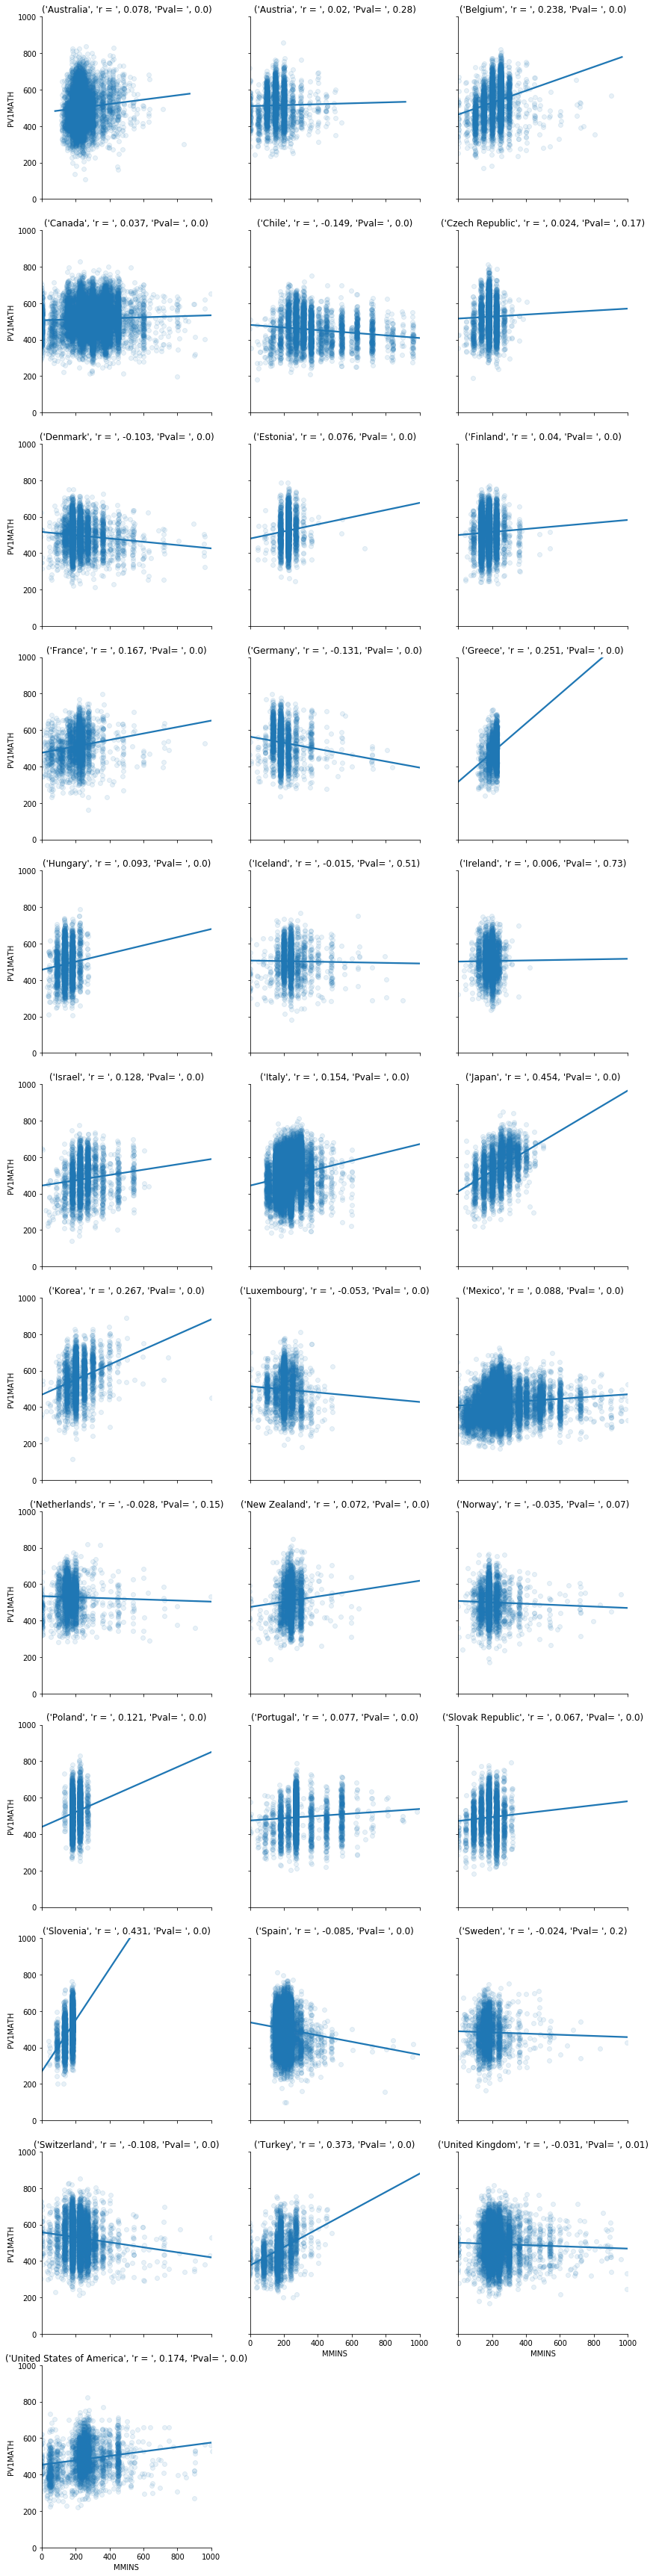

In [73]:
#you can change the threshold here except the p-values and R values might be a little off. 
threshold=1000
g=sb.FacetGrid(data=oecd_countries[oecd_countries['MMINS']<=threshold], col='CNT',col_wrap = 3, height=4)
g.map(sb.regplot,'MMINS', 'PV1MATH', ci=None, scatter_kws={'alpha':1/10}, x_jitter=5);
g.add_legend()
plt.xlim(0,threshold)
plt.ylim(0,1000)

#loops through each diagram to add a customised title showing the 'r' and 'pvalue'
i=0
for ax in g.axes.flatten():
    ax.set_title(label= (correlations_df_oecd.loc[i,'country'],'r = ',correlations_df_oecd.loc[i,'pearsonR-MMINS'].round(3),'Pval= ', correlations_df_oecd.loc[i,'p-value-MMINS'].round(2)))
    i=i+1
    
plt.tight_layout()

### Non-OECD countries

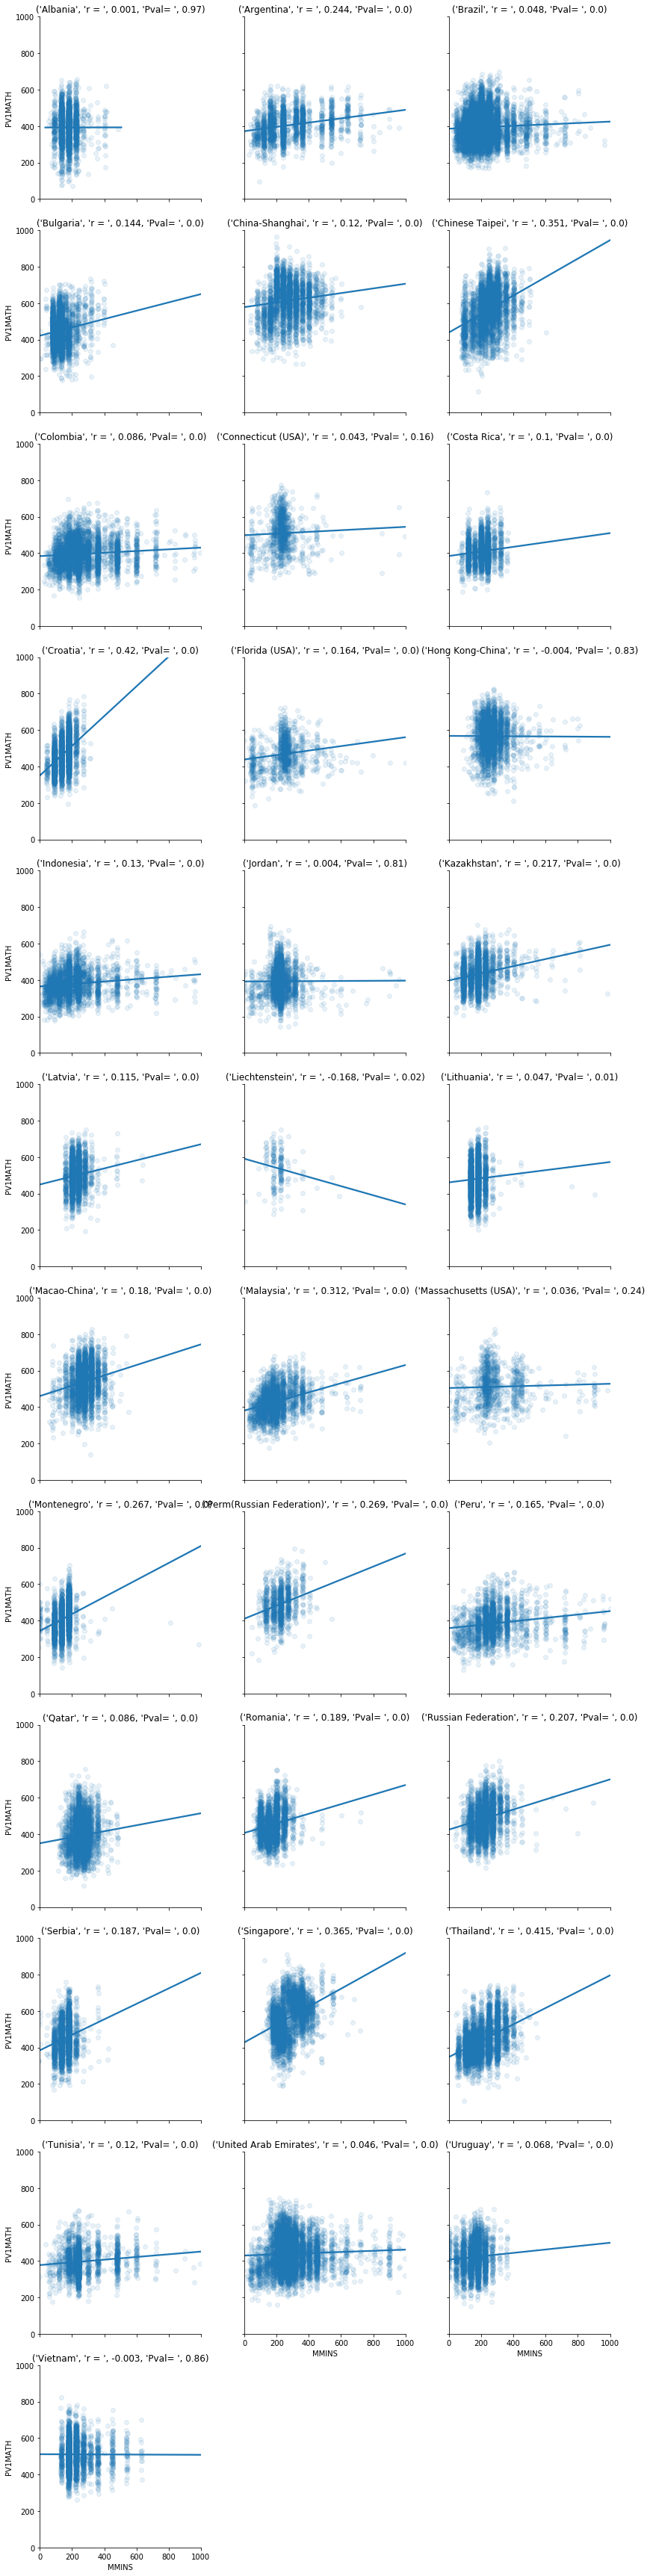

In [74]:
threshold=1000
g=sb.FacetGrid(data=non_oecd_countries[non_oecd_countries['MMINS']<=threshold], col='CNT',col_wrap = 3, height=4)
g.map(sb.regplot,'MMINS', 'PV1MATH', ci=None, scatter_kws={'alpha':1/10}, x_jitter=5)
plt.xlim(0,threshold)
plt.ylim(0,1000)

i=0
for ax in g.axes.flatten():
    ax.set_title(label= (correlations_df_n_oecd.loc[i,'country'],'r = ',correlations_df_n_oecd.loc[i,'pearsonR-MMINS'].round(3),'Pval= ', correlations_df_n_oecd.loc[i,'p-value-MMINS'].round(2)))
    i=i+1
    
plt.tight_layout()

## LMINS vs PV1READ on a country to country basis

### OECD countries

In [75]:
threshold=1000
g=sb.FacetGrid(data=oecd_countries[oecd_countries['MMINS']<=threshold], col='CNT',col_wrap = 3, height=4)
g.map(sb.regplot,'LMINS', 'PV1READ', ci=None, scatter_kws={'alpha':1/10}, x_jitter=5);
g.add_legend()
plt.xlim(0,threshold)
plt.ylim(0,1000)

i=0
for ax in g.axes.flatten():
    ax.set_title(label= (correlations_df_oecd.loc[i,'country'],'r = ',correlations_df_oecd.loc[i,'pearsonR-LMINS'].round(3),'Pval= ', correlations_df_oecd.loc[i,'p-value-LMINS'].round(2)))
    i=i+1
    
plt.tight_layout()

### Non-OECD countries

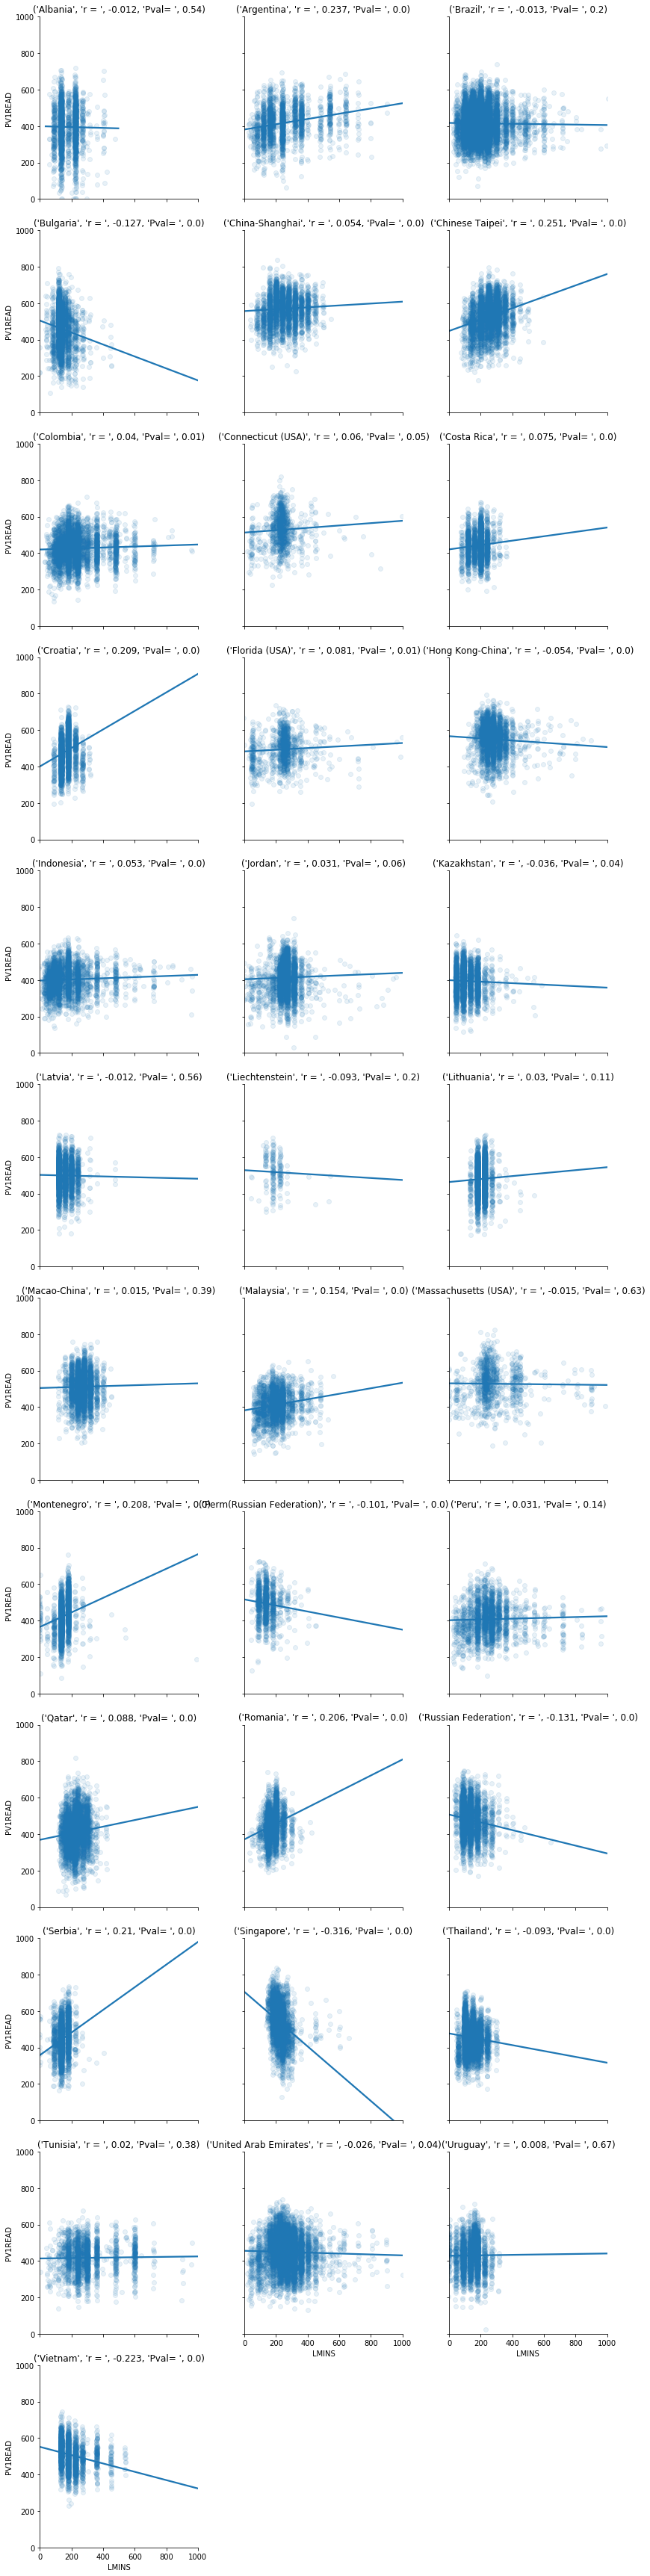

In [76]:
threshold=1000
g=sb.FacetGrid(data=non_oecd_countries[non_oecd_countries['MMINS']<=threshold], col='CNT',col_wrap = 3, height=4)
g.map(sb.regplot,'LMINS', 'PV1READ', ci=None, scatter_kws={'alpha':1/10}, x_jitter=5)
plt.xlim(0,threshold)
plt.ylim(0,1000)

i=0
for ax in g.axes.flatten():
    ax.set_title(label= (correlations_df_n_oecd.loc[i,'country'],'r = ',correlations_df_n_oecd.loc[i,'pearsonR-LMINS'].round(3),'Pval= ', correlations_df_n_oecd.loc[i,'p-value-LMINS'].round(2)))
    i=i+1
    
plt.tight_layout()

## SMINS vs PV1SCIE on a country to country basis.

### OECD countries

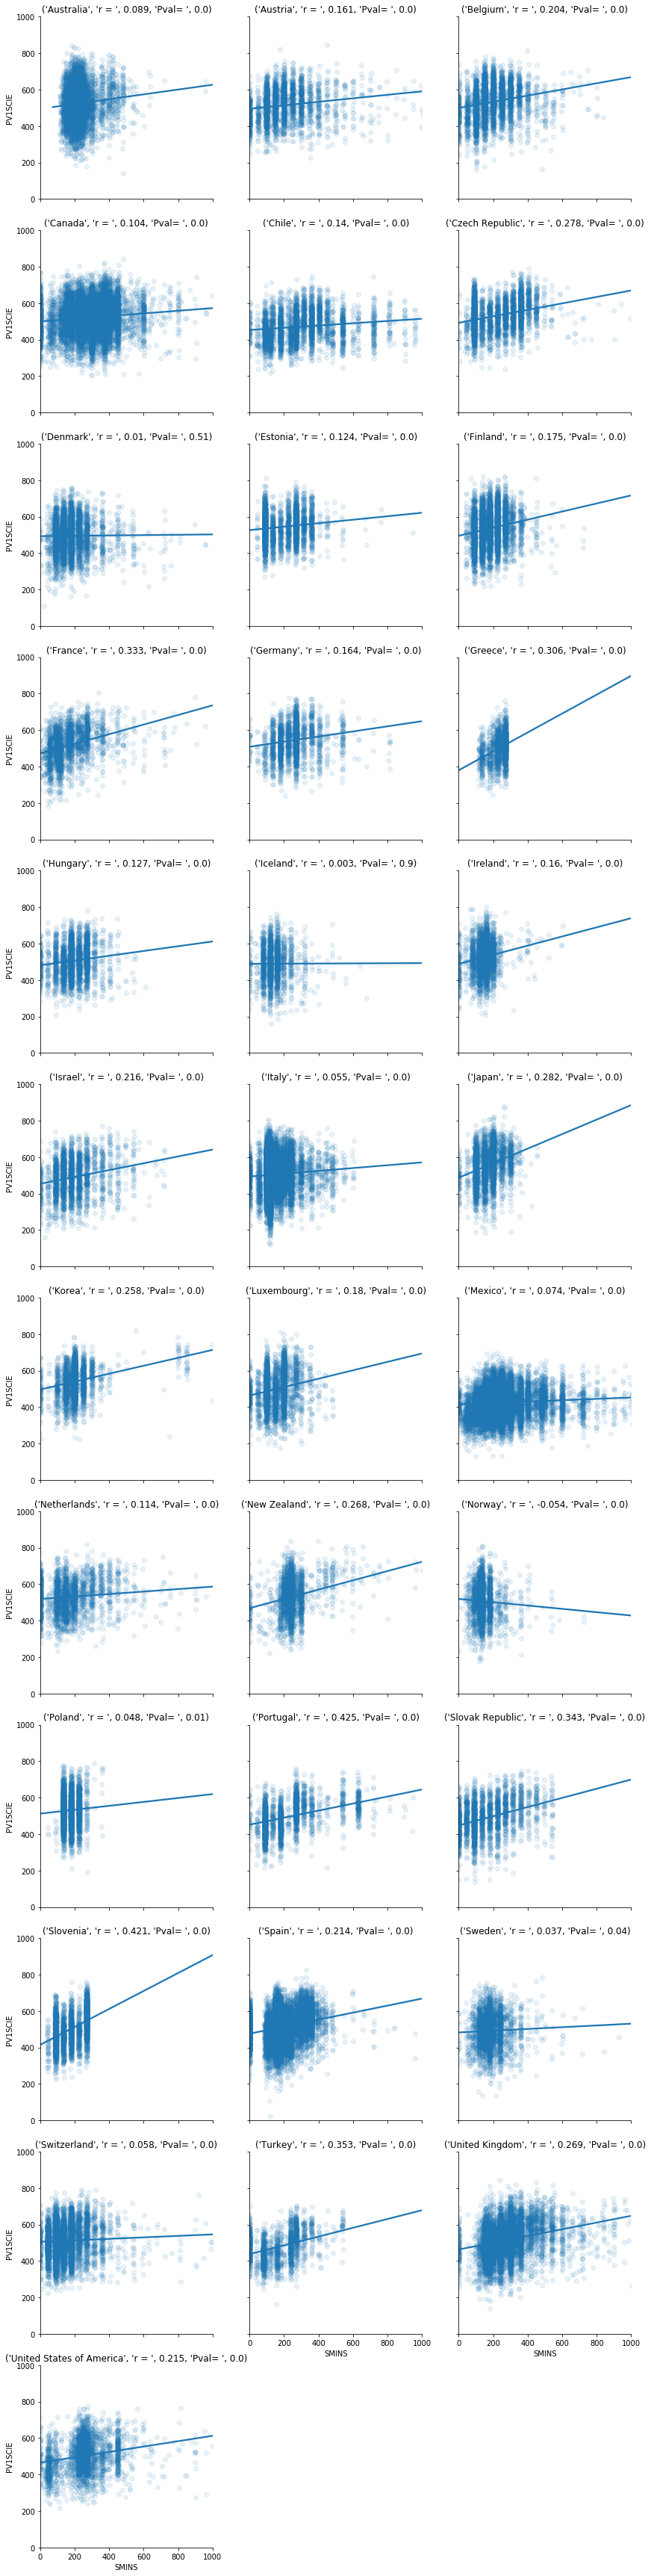

In [77]:
threshold=1000
g=sb.FacetGrid(data=oecd_countries[oecd_countries['MMINS']<=threshold], col='CNT',col_wrap = 3, height=4)
g.map(sb.regplot,'SMINS', 'PV1SCIE', ci=None, scatter_kws={'alpha':1/10}, x_jitter=5);
g.add_legend()
plt.xlim(0,threshold)
plt.ylim(0,1000)

i=0
for ax in g.axes.flatten():
    ax.set_title(label= (correlations_df_oecd.loc[i,'country'],'r = ',correlations_df_oecd.loc[i,'pearsonR-SMINS'].round(3),'Pval= ', correlations_df_oecd.loc[i,'p-value-SMINS'].round(2)))
    i=i+1
    
plt.tight_layout()

### Non-OECD countries

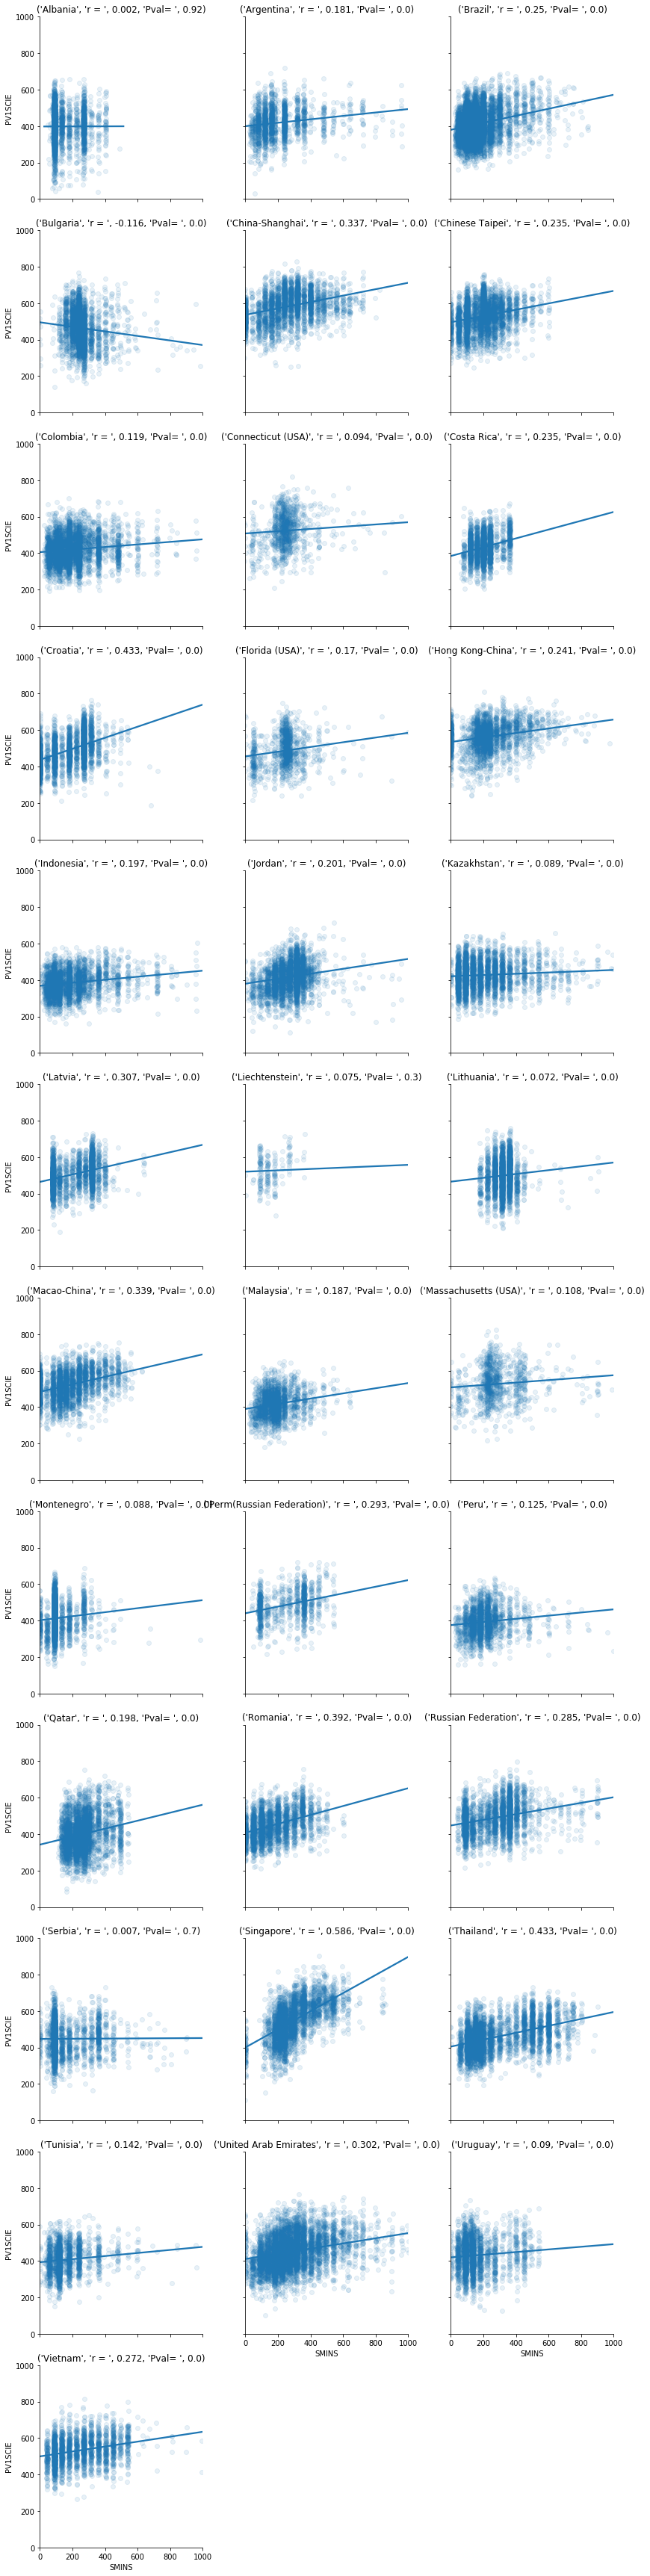

In [78]:
threshold=1000
g=sb.FacetGrid(data=non_oecd_countries[non_oecd_countries['MMINS']<=threshold], col='CNT',col_wrap = 3, height=4)
g.map(sb.regplot,'SMINS', 'PV1SCIE', ci=None, scatter_kws={'alpha':1/10}, x_jitter=5)
plt.xlim(0,threshold)
plt.ylim(0,1000)

i=0
for ax in g.axes.flatten():
    ax.set_title(label= (correlations_df_n_oecd.loc[i,'country'],'r = ',correlations_df_n_oecd.loc[i,'pearsonR-SMINS'].round(3),'Pval= ', correlations_df_n_oecd.loc[i,'p-value-SMINS'].round(2)))
    i=i+1
    
plt.tight_layout()

I decided to stop the exploration over here as looking at reasons why some countries have negative correlations is beyond the scope of this project.

I want to add that it would be incorrect to try and find a function or a linear relationship between MMINS and PV1MATH LMINS-PV1READ and SMINS-PV1SCIE because i'm sure there are a lot of outliers and a lot of different reasons why we are not seeing the typical positive correlation in every country. It would take someone to investigate these results country by country and it would be premature to try and find a definitive general trend right now.

#### Exploring the Test scores for Specific countires

You can also explore the specific test score results in each country and filter out the results by Gender,

In [79]:
usa_df = oecd_countries.query('CNT=="United States of America"')

In [80]:
usa_df.count()

CNT        3074
OECD       3074
Gender     3074
PV1MATH    3074
PV1READ    3074
PV1SCIE    3074
LMINS      3048
MMINS      3074
SMINS      3032
AVG        3074
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


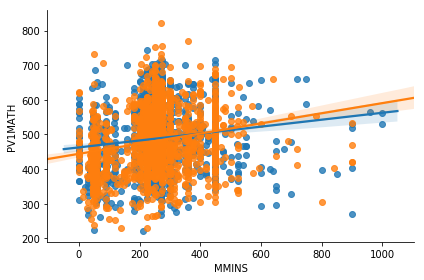

In [87]:
g= sb.FacetGrid(data=usa_df, hue='Gender', size =4, aspect =1.5, legend_out=True)

g= g.map(sb.regplot, 'MMINS', 'PV1MATH')

#sb.regplot(data=usa_df, x='MMINS', y='PV1MATH', marker='Gender', ci=None, scatter_kws={'alpha':1/10})

Here we see that there is a difference with regards to the slope of Females and Males but this set is still kind of messy as a lot of the data points are overlapping. You could plot 2 subplots and find the relationships but again, I feel like it would take a deeper investigation which is beyond the scope of this project.


In [83]:
correlations_df_oecd.query('country =="United States of America"')[['country','pearsonR-MMINS','p-value-MMINS']]

country pearsonR-MMINS p-value-MMINS
33  United States of America       0.173925   2.64825e-22